# io包中的接口和工具
我们在前几篇文章中，主要讨论了`strings.Builder`、`strings.Reader`和`bytes.Buffer`这三个数据类型。

## 知识回顾
还记得吗？当时我还问过你“它们都实现了哪些接口”。在我们继续讲解io包中的接口和工具之前，我先来解答一下这个问题。

`strings.Builder`类型主要用于构建字符串，它的指针类型实现的接口有`io.Writer`、`io.ByteWriter`和`fmt.Stringer`。另外，它其实还实现了一个io包的包级私有接口`io.stringWriter`（自Go 1.12起它会更名为`io.StringWriter`）。

`strings.Reader`类型主要用于读取字符串，它的指针类型实现的接口比较多，包括：

`io.Reader`；
`io.ReaderAt`；
`io.ByteReader`；
`io.RuneReader`；
`io.Seeker`；
`io.ByteScanner`；
`io.RuneScanner`；
`io.WriterTo`；
共有8个，它们都是io包中的接口。

其中，`io.ByteScanner`是`io.ByteReader`的扩展接口，而`io.RuneScanner`又是`io.RuneReader`的扩展接口。

`bytes.Buffer`是集读、写功能于一身的数据类型，它非常适合作为字节序列的缓冲区。 它的指针类型实现的接口就更多了。

更具体地说，该指针类型实现的读取相关的接口有下面几个。

`io.Reader`；
`io.ByteReader`；
`io.RuneReader`；
`io.ByteScanner`；
`io.RuneScanner`；
`io.WriterTo`；
共有6个。而其实现的写入相关的接口则有这些。

`io.Writer`；
`io.ByteWriter`；
`io.stringWriter`；
`io.ReaderFrom`；
共4个。此外，它还实现了导出相关的接口`fmt.Stringer`。

## 前导内容：io包中接口的好处与优势

那么，这些类型实现了这么多的接口，其动机（或者说目的）究竟是什么呢？

**简单地说，这是为了提高不同程序实体之间的互操作性**。远的不说，我们就以io包中的一些函数为例。

在`io`包中，有这样几个用于拷贝数据的函数，它们是：

- `io.Copy`；
- `io.CopyBuffer`；
- `io.CopyN`。
虽然这几个函数在功能上都略有差别，但是它们都首先会接受两个参数，即：用于代表数据目的地、`io.Writer`类型的参数`dst`，以及用于代表数据来源的、`io.Reader`类型的参数`src`。这些函数的功能大致上都是把数据从`src`拷贝到`dst`。

不论我们给予它们的第一个参数值是什么类型的，只要这个类型实现了`io.Writer`接口即可。

同样的，无论我们传给它们的第二个参数值的实际类型是什么，只要该类型实现了`io.Reader`接口就行。

一旦我们满足了这两个条件，这些函数几乎就可以正常地执行了。当然了，函数中还会对必要的参数值进行有效性的检查，如果检查不通过，它的执行也是不能够成功结束的。

下面来看一段示例代码：


In [ ]:
src := strings.NewReader(
 "CopyN copies n bytes (or until an error) from src to dst. " +
  "It returns the number of bytes copied and " +
  "the earliest error encountered while copying.")
dst := new(strings.Builder)
written, err := io.CopyN(dst, src, 58)
if err != nil {
 fmt.Printf("error: %v\n", err)
} else {
 fmt.Printf("Written(%d): %q\n", written, dst.String())
}

我先使用`strings.NewReader`创建了一个字符串读取器，并把它赋给了变量`src`，然后我又`new`了一个字符串构建器，并将其赋予了变量`dst`。

之后，我在调用`io.CopyN`函数的时候，把这两个变量的值都传了进去，同时把给这个函数的第三个参数值设定为了`58`。也就是说，我想从`src`中拷贝前`58`个字节到`dst`那里。

虽然，变量`src`和`dst`的类型分别是`strings.Reader`和`strings.Builder`，但是当它们被传到`io.CopyN`函数的时候，就已经分别被包装成了`io.Reader`类型和`io.Writer`类型的值。**`io.CopyN`函数也根本不会去在意，它们的实际类型到底是什么**。

**为了优化的目的，`io.CopyN`函数中的代码会对参数值进行再包装，也会检测这些参数值是否还实现了别的接口，甚至还会去探求某个参数值被包装后的实际类型，是否为某个特殊的类型**。

但是，从总体上来看，这些代码都是面向参数声明中的接口来做的。`io.CopyN`函数的作者通过面向接口编程，极大地拓展了它的适用范围和应用场景。

换个角度看，正因为`strings.Reader`类型和`strings.Builder`类型都实现了不少接口，所以它们的值才能够被使用在更广阔的场景中。

换句话说，如此一来，`Go`语言的各种库中，能够操作它们的函数和数据类型明显多了很多。

这就是我想要告诉你的，`strings`包和`bytes`包中的数据类型在实现了若干接口之后得到的最大好处。

也可以说，这就是面向接口编程带来的最大优势。这些数据类型和函数的做法，也是非常值得我们在编程的过程中去效仿的。

可以看到，前文所述的几个类型实现的大都是`io`代码包中的接口。实际上，`io`包中的接口，对于`Go`语言的标准库和很多第三方库而言，都起着举足轻重的作用。它们非常基础也非常重要。

就拿`io.Reader`和`io.Writer`这两个最核心的接口来说，它们是很多接口的扩展对象和设计源泉。同时，单从`Go`语言的标准库中统计，实现了它们的数据类型都（各自）有上百个，而引用它们的代码更是都（各自）有400多处。

很多数据类型实现了`io.Reader`接口，是因为它们提供了从某处读取数据的功能。类似的，许多能够把数据写入某处的数据类型，也都会去实现`io.Writer`接口。

其实，有不少类型的设计初衷都是：实现这两个核心接口的某个，或某些扩展接口，以提供比单纯的字节序列读取或写入，更加丰富的功能，就像前面讲到的那几个`strings`包和`bytes`包中的数据类型那样。

**在`Go`语言中，对接口的扩展是通过接口类型之间的嵌入来实现的，这也常被叫做接口的组合**。

我在讲接口的时候也提到过，`Go`语言提倡使用小接口加接口组合的方式，来扩展程序的行为以及增加程序的灵活性。`io`代码包恰恰就可以作为这样的一个标杆，它可以成为我们运用这种技巧时的一个参考标准。

下面，我就以`io.Reader`接口为对象提出一个与接口扩展和实现有关的问题。如果你研究过这个核心接口以及相关的数据类型的话，这个问题回答起来就并不困难。

**我们今天的问题是：在io包中，io.Reader的扩展接口和实现类型都有哪些？它们分别都有什么功用？**

这道题的典型回答是这样的。在`io`包中，`io.Reader`的扩展接口有下面几种。

1. `io.ReadWriter`：此接口既是`io.Reader`的扩展接口，也是`io.Writer`的扩展接口。换句话说，该接口定义了一组行为，包含且仅包含了基本的字节序列读取方法`Read`，和字节序列写入方法`Write``。
2. `io.ReadCloser`：此接口除了包含基本的字节序列读取方法之外，还拥有一个基本的关闭方法`Close`。后者一般用于关闭数据读写的通路。这个接口其实是`io.Reader`接口和`io.Closer`接口的组合。
3. `io.ReadWriteCloser`：很明显，此接口是`io.Reader`、`io.Writer`和`io.Closer`这三个接口的组合。
4. `io.ReadSeeker`：此接口的特点是拥有一个用于寻找读写位置的基本方法`Seek`。更具体地说，该方法可以根据给定的偏移量基于数据的起始位置、末尾位置，或者当前读写位置去寻找新的读写位置。这个新的读写位置用于表明下一次读或写时的起始索引。`Seek`是`io.Seeker`接口唯一拥有的方法。
5. `io.ReadWriteSeeker`：显然，此接口是另一个三合一的扩展接口，它是`io.Reader`、`io.Writer`和`io.Seeker`的组合。

再来说说`io`包中的`io.Reader`接口的实现类型，它们包括下面几项内容。

1. `*io.LimitedReader`：此类型的基本类型会包装`io.Reader`类型的值，并提供一个额外的受限读取的功能。**所谓的受限读取指的是，此类型的读取方法Read返回的总数据量会受到限制，无论该方法被调用多少次。这个限制由该类型的字段N指明，单位是字节**。

2. `*io.SectionReader`：此类型的基本类型可以包装`io.ReaderAt`类型的值，并且会限制它的`Read`方法，只能够读取原始数据中的某一个部分（或者说某一段）。-
这个数据段的起始位置和末尾位置，需要在它被初始化的时候就指明，并且之后无法变更。该类型值的行为与切片有些类似，它只会对外暴露在其窗口之中的那些数据。

3. `*io.teeReader`：此类型是一个包级私有的数据类型，也是`io.TeeReader`函数结果值的实际类型。这个函数接受两个参数`r`和`w`，类型分别是`io.Reader`和`io.Writer`。-
其结果值的`Read`方法会把`r`中的数据经过作为方法参数的字节切片`p`写入到`w`。可以说，这个值就是`r`和`w`之间的数据桥梁，而那个参数`p`就是这座桥上的数据搬运者。

4. `*io.multiReader`：此类型也是一个包级私有的数据类型。类似的，`io`包中有一个名为`MultiReader`的函数，它可以接受若干个`io.Reader`类型的参数值，并返回一个实际类型为`io.multiReader`的结果值。
当这个结果值的`Read`方法被调用时，它会顺序地从前面那些`io.Reader`类型的参数值中读取数据。因此，我们也可以称之为`多对象读取器`。

5. `*io.pipe`：此类型为一个包级私有的数据类型，它比上述类型都要复杂得多。它不但实现了`io.Reader`接口，而且还实现了`io.Writer`接口。-
实际上，`io.PipeReader`类型和`io.PipeWriter`类型拥有的所有指针方法都是以它为基础的。这些方法都只是代理了`io.pipe`类型值所拥有的某一个方法而已。-
又因为`io.Pipe`函数会返回这两个类型的**指针值**并分别把它们作为其生成的同步内存管道的两端，所以可以说，`*io.pipe`类型就是`io`包提供的同步内存管道的核心实现。

6. `*io.PipeReader`：此类型可以被视为`io.pipe`类型的代理类型。它代理了后者的一部分功能，并基于后者实现了`io.ReadCloser`接口。同时，它还定义了同步内存管道的读取端。

注意，我在这里忽略掉了测试源码文件中的实现类型，以及不会以任何形式直接对外暴露的那些实现类型。

## 问题解析
我问这个问题的目的主要是评估你对`io`包的熟悉程度。这个代码包是`Go`语言标准库中所有`I/O`相关`API`的根基，所以，我们必须对其中的每一个程序实体都有所了解。

然而，由于该包包含的内容众多，因此这里的问题是以`io.Reader`接口作为切入点的。通过`io.Reader`接口，我们应该能够梳理出基于它的类型树，并知晓其中每一个类型的功用。

`io.Reader`可谓是`io`包乃至是整个`Go`语言标准库中的核心接口，所以我们可以从它那里牵扯出很多扩展接口和实现类型。

我在本问题的典型回答中，为你罗列和介绍了`io`包范围内的相关数据类型。

这些类型中的每一个都值得你认真去理解，尤其是那几个实现了`io.Reader`接口的类型。它们实现的功能在细节上都各有不同。

在很多时候，我们可以根据实际需求将它们搭配起来使用。

例如，对施加在原始数据之上的（由Read方法提供的）读取功能进行多层次的包装（比如受限读取和多对象读取等），以满足较为复杂的读取需求。

在实际的面试中，只要应聘者能够从某一个方面出发，说出`io.Reader`的扩展接口及其存在意义，或者说清楚该接口的三五个实现类型，那么就可以算是基本回答正确了。

比如，从读取、写入、关闭这一系列的基本功能出发，描述清楚：

`io.ReadWriter`；
`io.ReadCloser`；
`io.ReadWriteCloser`；
这几个接口。

又比如，说明白`io.LimitedReader`和`io.SectionReader`这两个类型之间的异同点。

再比如，阐述`*io.SectionReader`类型实现`io.ReadSeeker`接口的具体方式，等等。不过，这只是合格的门槛，应聘者回答得越全面越好。

我在示例文件demo82.go中写了一些代码，以展示上述类型的一些基本用法，供你参考。

## 总结
我们今天一直在讨论和梳理`io`代码包中的程序实体，尤其是那些重要的接口及其实现类型。

`io`包中的接口对于`Go`语言的标准库和很多第三方库而言，都起着举足轻重的作用。其中最核心的`io.Reader`接口和`io.Writer`接口，是很多接口的扩展对象或设计源泉。我们下一节会继续讲解`io`包中的接口内容。

你用过哪些`io`包中的接口和工具呢，又有哪些收获和感受呢，你可以给我留言，我们一起讨论。感谢你的收听，我们下次再见。

上面中我们主要认识了一些io.Reader的扩展接口和实现类型，当然`io`代码包中的核心接口不止`io.Reader`一个。

我们基于其引出一条主线，只是`io`包类型体系中的一部分。现在我们从另外一个角度去探索来对`io`包有更加全面的了解。

## 知识扩展

**问题：`io`包中的接口都有哪些？它们之间都有着怎样的关系？**

我们可以把没有**嵌入其他接口并且只定义了一个方法的接口叫做简单接口**。在io包中，这样的接口一共有11个。

在它们之中，有的接口有着众多的扩展接口和实现类型，我们可以称之为`核心接口`。`io`包中的核心接口只有3个，它们是：`io.Reader`、`io.Writer`和`io.Closer`。

我们还可以把`io`包中的简单接口分为四大类。这四大类接口分别针对于四种操作，即：**读取、写入、关闭和读写位置设定**。前三种操作属于基本的I/O操作。

关于`读取`操作，我们在前面已经重点讨论过核心接口`io.Reader`。它在io包中有5个**扩展接口**，并有6个**实现类型**。除了它，这个包中针对读取操作的接口还有不少。我们下面就来梳理一下。

首先来看`io.ByteReader`和`io.RuneReader`这两个简单接口。它们分别定义了一个读取方法，即：`ReadByte`和`ReadRune`。

但与`io.Reader`接口中`Read`方法不同的是，这两个读取方法分别只能够读取**下一个单一的字节和`Unicode`字符**。

我们之前讲过的数据类型`strings.Reader`和`bytes.Buffer`都是`io.ByteReader`和`io.RuneReader`的实现类型。

不仅如此，这两个类型还都实现了`io.ByteScanner`接口和`io.RuneScanner`接口。

`io.ByteScanner`接口内嵌了简单接口`io.ByteReader`，并定义了额外的`UnreadByte`方法。如此一来，它就抽象出了一个能够读取和读回退单个字节的功能集。

与之类似，`io.RuneScanner`内嵌了简单接口`io.RuneReader`，并定义了额外的`UnreadRune`方法。它抽象的是可以读取和读回退单个`Unicode`字符的功能集。

再来看`io.ReaderAt`接口。它也是一个简单接口，其中只定义了一个方法`ReadAt`。与我们在前面说过的读取方法都不同，`ReadAt`是一个纯粹的只读方法。

它只去读取其所属值中包含的字节，而不对这个值进行任何的改动，比如，**它绝对不能去修改已读计数的值。**这也是`io.ReaderAt`接口与其实现类型之间最重要的一个约定。

因此，如果仅仅并发地调用某一个值的`ReadAt`方法，那么安全性应该是可以得到保障的。

另外，还有一个读取操作相关的接口我们没有介绍过，它就是`io.WriterTo`。这个接口定义了一个名为`WriteTo`的方法。

千万不要被它的名字迷惑，**这个`WriteTo`方法其实是一个读取方法**。它会接受一个`io.Writer`类型的参数值，并会把其所属值中的数据**读出并写入**到这个参数值中。

与之相对应的是`io.ReaderFrom`接口。它定义了一个名叫`ReadFrom`的写入方法。该方法会接受一个`io.Reader`类型的参数值，并会从**该参数值中读出数据,并写入到其所属值中**。

场景一：使用 WriteTo (水桶 A 是主角)
- 代码： A.WriteTo(B)

- 独白： 水桶 A 说：“我要把我肚子里的水，倒进 B 里面去。”

- 解析： 这里 A 是方法的接收者。A 内部必须实现“读取自己”和“写入 B”的逻辑。

场景二：使用 ReadFrom (水缸 B 是主角)
- 代码： B.ReadFrom(A)

- 独白： 水缸 B 说：“我要把 A 里面的水，吸到 我自己的肚子里来。”

- 解析： 这里 B 是方法的接收者。B 内部必须实现“读取 A”和“写入自己”的逻辑。

值得一提的是，我们在前面用到过的`io.CopyN`函数，在复制数据的时候会先检测其参数`src`的值，是否实现了`io.WriterTo`接口。如果是，那么它就直接利用该值的`WriteTo`方法，把其中的数据拷贝给参数`dst`代表的值。

类似的，这个函数还会检测`dst`的值是否实现了`io.ReaderFrom`接口。如果是，那么它就会利用这个值的`ReadFrom`方法，直接从`src`那里把数据拷贝进该值。

实际上，对于`io.Copy`函数和`io.CopyBuffer`函数来说也是如此，因为它们在内部做数据复制的时候用的都是同一套代码。

你也看到了，`io.ReaderFrom`接口与`io.WriterTo`接口对应得很规整。实际上，在`io`包中，与写入操作有关的接口都与读取操作的相关接口有着一定的对应关系。下面，我们就来说说写入操作相关的接口。

首先当然是核心接口`io.Writer`。基于它的扩展接口除了有我们已知的`io.ReadWriter`、`io.ReadWriteCloser`和`io.ReadWriteSeeker`之外，还有`io.WriteCloser`和`io.WriteSeeker`。

我们之前提及的`*io.pipe`就是`io.ReadWriter`接口的实现类型。然而，在`io`包中并没有`io.ReadWriteCloser`接口的实现，它的实现类型主要集中在`net`包中。

除此之外，写入操作相关的简单接口还有`io.ByteWriter`和`io.WriterAt`。可惜，`io`包中也没有它们的实现类型。不过，有一个数据类型值得在这里提一句，那就是**os.File**。

这个类型不但是`io.WriterAt`接口的实现类型，还同时实现了`io.ReadWriteCloser`接口和`io.ReadWriteSeeker`接口。也就是说，该类型支持的I/O操作非常的丰富。

`io.Seeker`接口作为一个读写位置设定相关的简单接口，也仅仅定义了一个方法，名叫`Seek`。

我在讲`strings.Reader`类型的时候还专门说过这个`Seek`方法，当时还给出了一个与已读计数估算有关的例子。**该方法主要用于寻找并设定下一次读取或写入时的起始索引位置**。

`io`包中有几个基于`io.Seeker`的扩展接口，包括前面讲过的`io.ReadSeeker`和`io.ReadWriteSeeker`，以及还未曾提过的`io.WriteSeeker`。`io.WriteSeeker`是基于`io.Writer`和`io.Seeker`的扩展接口。

我们之前多次提到的两个指针类型`strings.Reader`和`io.SectionReader`都实现了`io.Seeker`接口。顺便说一句，这两个类型也都是`io.ReaderAt`接口的实现类型。

最后，关闭操作相关的接口`io.Closer`非常通用，它的扩展接口和实现类型都不少。我们单从名称上就能够一眼看出`io`包中的哪些接口是它的扩展接口。至于它的实现类型，`io`包中只有`io.PipeReader`和`io.PipeWriter`。

## 总结
我们来总结一下这两篇的内容。在`Go`语言中，对接口的扩展是通过接口类型之间的嵌入来实现的，这也常被叫做接口的组合。而`io`代码包恰恰就可以作为接口扩展的一个标杆，它可以成为我们运用这种技巧时的一个参考标准。

在本文中，我根据接口定义的方法的数量以及是否有接口嵌入，把`io`包中的接口分为了简单接口和扩展接口。

同时，我又根据这些简单接口的扩展接口和实现类型的数量级，把它们分为了核心接口和非核心接口。

在`io`包中，称得上核心接口的简单接口只有`3`个，即：`io.Reader`、`io.Writer`和`io.Closer`。这些核心接口在Go语言标准库中的实现类型都在200个以上。

另外，根据针对的`I/O`操作的不同，我还把简单接口分为了四大类。这四大类接口针对的操作分别是：读取、写入、关闭和读写位置设定。

其中，前三种操作属于基本的`I/O`操作。基于此，我带你梳理了每个类别的简单接口，并讲解了它们在`io`包中的扩展接口，以及具有代表性的实现类型。

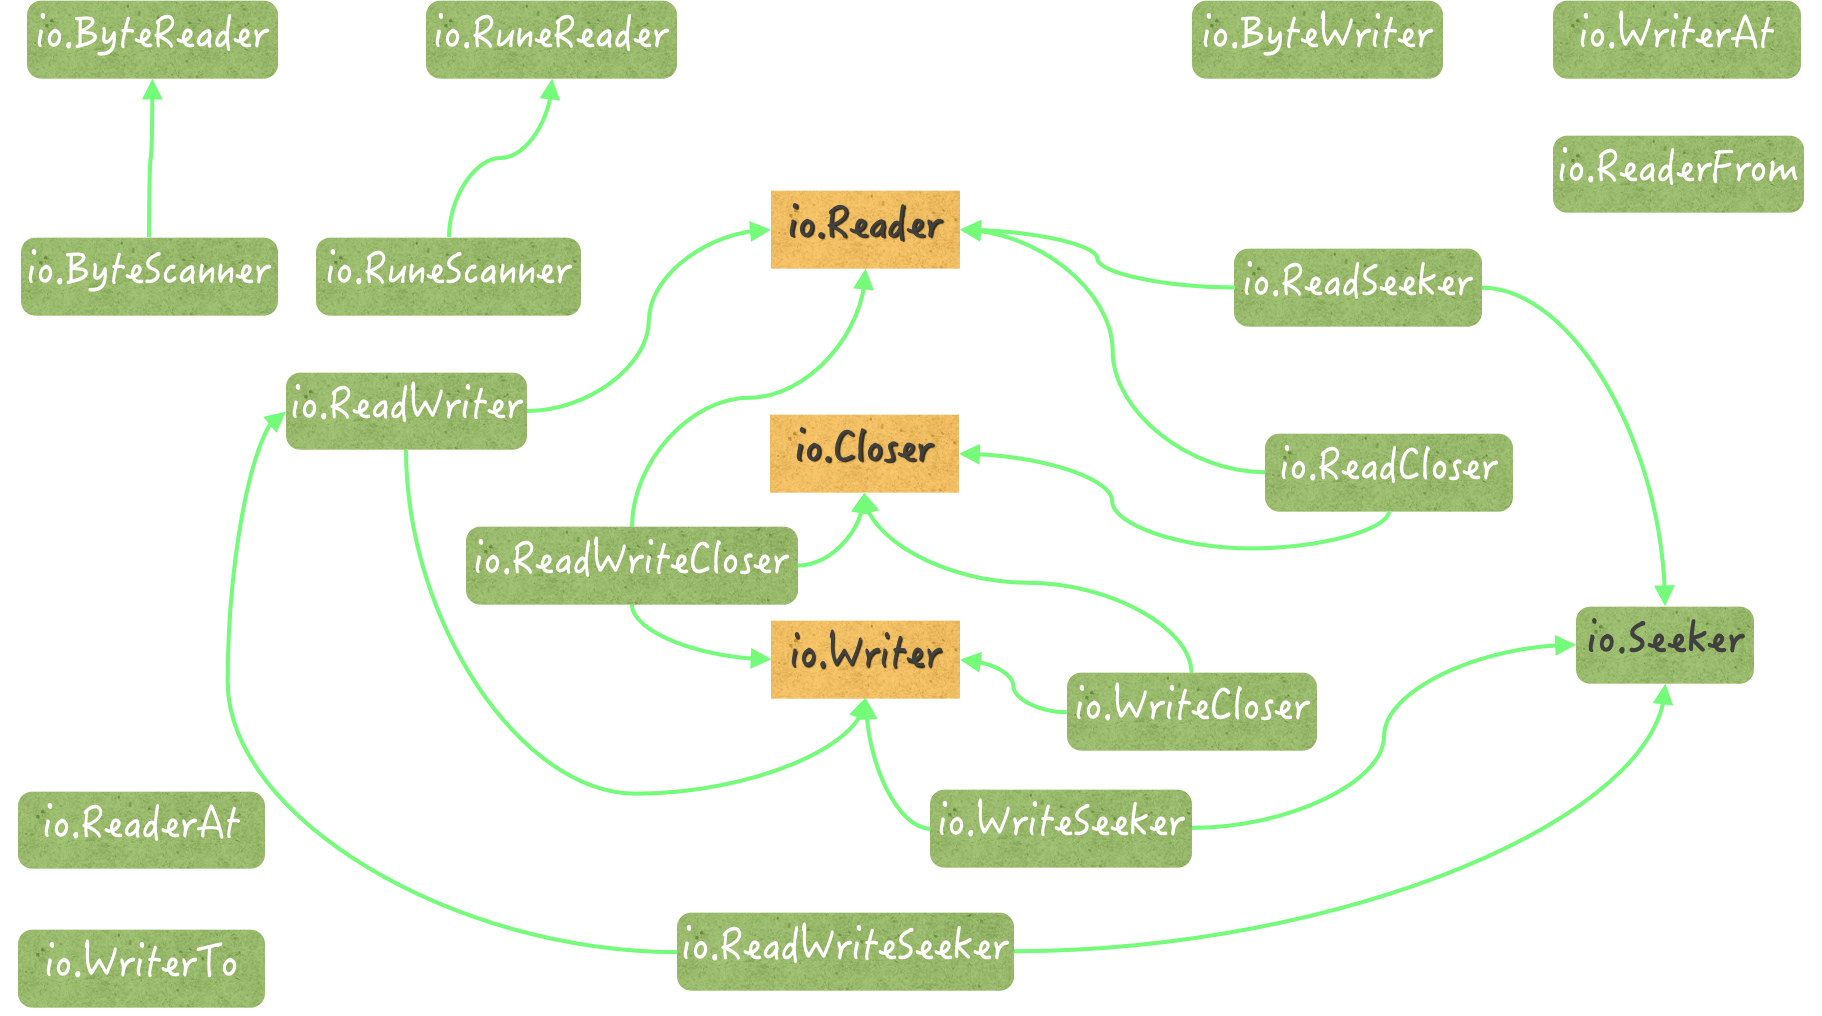

除此之外，我还从多个维度为你描述了一些重要程序实体的功用和机理，比如：数据段读取器`io.SectionReader`、作为同步内存管道核心实现的`io.pipe`类型，以及用于数据拷贝的`io.CopyN`函数，等等。

我如此详尽且多角度的阐释，正是为了让你能够记牢io代码包中有着网状关系的接口和数据类型。我希望这个目的已经达到了，最起码，本文可以作为你深刻记忆它们的开始。

**最后再强调一下，io包中的简单接口共有11个。其中，读取操作相关的接口有5个，写入操作相关的接口有4个，而与关闭操作有关的接口只有1个，另外还有一个读写位置设定相关的接口。**

此外，`io`包还包含了`9`个基于这些简单接口的扩展接口。你需要在今后思考和实践的是，你在什么时候应该编写哪些数据类型实现io包中的哪些接口，并以此得到最大的好处。

## 思考题
`io`包中的同步内存管道的运作机制是什么？

我们实际上已经在正文中做了基本的说明。

`io.Pipe`函数会返回一个`io.PipeReader`类型的值和一个`io.PipeWriter`类型的值，并将它们分别作为管道的两端。而这两个值在底层其实只是代理了同一个`*io.pipe`类型值的功能而已。

`io.pipe`类型通过无缓冲的通道实现了读操作与写操作之间的同步，并且通过互斥锁实现了写操作之间的串行化。另外，它还使用原子值来处理错误。这些共同保证了这个同步内存管道的并发安全性。


gemini总结：
io.Pipe 在 Go 语言中实现了一种跨 Goroutine 的同步数据传输机制。它不使用内部缓冲区存储数据，而是利用互斥锁（Mutex）和条件变量（Cond）来协调读写双方：先到达的一方会阻塞挂起，直到另一方到达。一旦双方“握手”成功，数据会直接从写入者的内存地址复制到读取者的内存地址，随后双方解除阻塞，继续执行。这种机制确保了数据流动的严格同步和内存的高效利用。